## SMDM Project - Coded

```
A n a n d B R | B a t c h : P G P D S B A . O . J A N 2 4
```

#### Problem 1

***Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.***

#### Objective

```They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Data Overview

In [5]:
df = pd.read_csv('austo_automobile+29+29.csv')

In [6]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [8]:
df.shape

(1581, 14)

#### Insight:
- data has 1581 rows and 14 columns
- unsupervised learning to be conducted
- First glance, data type of the fields are appropriate

In [10]:
df.isna().sum()[df.isna().sum() > 0]

Gender             53
Partner_salary    106
dtype: int64

***2 Fields Gender and Partner_salary has missing Values***

In [11]:
# SPlit the columns to 2 List , categorical and Numerical
cat , nums = [], []
for i in df.columns:
    if df[i].dtypes != 'object':
        nums.append(i)
    else:
        cat.append(i)
print(cat)
print(nums)

['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']


In [12]:
# identify the Categorical fields and respective value counts
# this method also display if adjustments required
for i in cat:
    print(f'Field {df[i].value_counts(normalize = True)*100}')
    print('*'*20)

Field Gender
Male      78.468586
Female    21.400524
Femal      0.065445
Femle      0.065445
Name: proportion, dtype: float64
********************
Field Profession
Salaried    56.672992
Business    43.327008
Name: proportion, dtype: float64
********************
Field Marital_status
Married    91.271347
Single      8.728653
Name: proportion, dtype: float64
********************
Field Education
Post Graduate    62.30234
Graduate         37.69766
Name: proportion, dtype: float64
********************
Field Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64
********************
Field House_loan
No     66.666667
Yes    33.333333
Name: proportion, dtype: float64
********************
Field Partner_working
Yes    54.901961
No     45.098039
Name: proportion, dtype: float64
********************
Field Make
Sedan        44.402277
Hatchback    36.812144
SUV          18.785579
Name: proportion, dtype: float64
********************


***columns Gender Values 'Femle', 'Femal' to be relplaced with 'Female'***

In [13]:
df.Gender.replace(to_replace=['Femle', 'Femal'], value='Female', inplace=True)

In [14]:
df.Gender.value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [15]:
df[nums].describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1475.000000   
mean     31.922201          2.457938  60392.220114    20225.559322   
std       8.425978          0.943483  14674.825044    19573.149277   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25600.000000   
75%      38.000000          3.000000  71800.000000    38300.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

### Summary of Numerical Variables:
- Age : Buyers Age Vary from 22 years to 54 years
- No of Dependents: Average 2 (median)
- Total Salary: Outlier exists (not necessary to be Treated)
- Price: Car Price Ranges from 18000 to 47000 with Mean values of 35597
- Partner_salary: Missing Value needs Treatment 

In [16]:
# partner_salary field NaN treatement
df[(df.Partner_salary.isna()) & (df.Partner_working == 'No')]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
40     53  Female   Salaried        Married       Graduate                 1   
115    48  Female   Salaried        Married  Post Graduate                 3   
163    45    Male   Salaried        Married  Post Graduate                 1   
164    45    Male   Business        Married       Graduate                 1   
165    45    Male   Salaried        Married       Graduate                 2   
...   ...     ...        ...            ...            ...               ...   
1559   22    Male   Business        Married  Post Graduate                 3   
1567   22    Male   Salaried         Single       Graduate                 0   
1568   22    Male   Salaried        Married       Graduate                 3   
1577   22    Male   Business        Married       Graduate                 4   
1579   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
40             Yes         No              No   72100             NaN   
115             No         No              No   78000             NaN   
163            Yes        Yes              No   71300             NaN   
164            Yes         No              No   56700             NaN   
165             No         No              No   55100             NaN   
...            ...        ...             ...     ...             ...   
1559           Yes         No              No   52100             NaN   
1567           Yes        Yes              No   39700             NaN   
1568            No        Yes              No   38000             NaN   
1577            No         No              No   32000             NaN   
1579           Yes        Yes              No   32200             NaN   

      Total_salary  Price       Make  
40           72100  60000        SUV  
115          78000  59000        SUV  
163          71300  42000      Sedan  
164          56700  54000      Sedan  
165          55100  65000        SUV  
...            ...    ...        ...  
1559         52100  28000  Hatchback  
1567         39700  23000  Hatchback  
1568         38000  23000      Sedan  
1577         32000  31000  Hatchback  
1579         32200  24000  Hatchback  

[90 rows x 14 columns]

#### Fill Partner_salary NaN values to Zero if the Partner_Working column is NO

In [17]:
df.Partner_salary = np.where(((df.Partner_salary.isna()) & (df.Partner_working == 'No')), 0, df.Partner_salary)

In [20]:
df[(df.Partner_salary.isna()) & (df.Partner_working == 'No')]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

In [21]:
df[(df.Partner_salary.isna()) & (df.Partner_working == 'Yes')].shape

(16, 14)

In [22]:
## Validating the value Impute taken Place
df.iloc[40]

Age                       53
Gender                Female
Profession          Salaried
Marital_status       Married
Education           Graduate
No_of_Dependents           1
Personal_loan            Yes
House_loan                No
Partner_working           No
Salary                 72100
Partner_salary           0.0
Total_salary           72100
Price                  60000
Make                     SUV
Name: 40, dtype: object

In [23]:
# identify the rows, where partner is working but partner salary is NaN 
df[(df.Partner_salary.isna()) & (df.Partner_working == 'Yes')]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
43              No         No             Yes   87600             NaN   
49              No         No             Yes   90300             NaN   
59             Yes         No             Yes   80600             NaN   
111             No         No             Yes   90300             NaN   
209            Yes         No             Yes   53400             NaN   
284             No         No             Yes   70500             NaN   
339            Yes         No             Yes   76800             NaN   
376            Yes         No             Yes   79000             NaN   
424            Yes        Yes             Yes   62000             NaN   
444             No         No             Yes   72300             NaN   
554             No         No             Yes   41600             NaN   
654            Yes        Yes             Yes   64700             NaN   
779             No        Yes             Yes   59000             NaN   
1345           Yes         No             Yes   34600             NaN   
1349           Yes         No             Yes   32400             NaN   
1546           Yes         No             Yes   32600             NaN   

      Total_salary  Price       Make  
43           88200  51000        SUV  
49          170400  69000        SUV  
59           81000  51000        SUV  
111         161100  62000        SUV  
209         123900  64000        SUV  
284         105800  33000      Sedan  
339         115400  50000      Sedan  
376         117400  46000      Sedan  
424         100700  46000      Sedan  
444         112400  48000      Sedan  
554          70100  48000      Sedan  
654          93200  30000  Hatchback  
779          87700  29000  Hatchback  
1345         58800  20000  Hatchback  
1349         58200  18000      Sedan  
1546         59300  20000  Hatchback

#### Treat the missing Values Partner_salary if Partner_working == Yes
***Total_salary - Salary = Partner_salary***

In [24]:
df['Partner_salary'] = np.where(((df.Partner_salary.isna()) & (df.Partner_working == 'Yes')), df['Total_salary'] - df['Salary'], df['Partner_salary'])

In [25]:
df[(df.Partner_salary.isna()) & (df.Partner_working == 'Yes')]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

In [26]:
df.iloc[444]

Age                            36
Gender                       Male
Profession               Business
Marital_status            Married
Education           Post Graduate
No_of_Dependents                2
Personal_loan                  No
House_loan                     No
Partner_working               Yes
Salary                      72300
Partner_salary            40100.0
Total_salary               112400
Price                       48000
Make                        Sedan
Name: 444, dtype: object

In [27]:
df.isna().sum()[df.isna().sum() > 0]

Gender    53
dtype: int64

***only Gender field NaN left to be trated***

In [28]:
df.loc[df.Gender.isna()].head()

Age Gender Profession Marital_status      Education  No_of_Dependents  \
24    46    NaN   Business        Married  Post Graduate                 3   
25    46    NaN   Salaried        Married  Post Graduate                 3   
67    53    NaN   Salaried        Married       Graduate                 4   
125   47    NaN   Salaried         Single  Post Graduate                 2   
203   44    NaN   Salaried         Single  Post Graduate                 0   

    Personal_loan House_loan Partner_working  Salary  Partner_salary  \
24            Yes         No             Yes   78000           600.0   
25             No         No             Yes   87900           700.0   
67            Yes         No             Yes   80900         30000.0   
125           Yes         No              No   87200             0.0   
203           Yes         No              No   68600             0.0   

     Total_salary  Price Make  
24          78600  50000  SUV  
25          88600  50000  SUV  
67         110900  49000  SUV  
125         87200  49000  SUV  
203         68600  50000  SUV

In [29]:
df.Gender.value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [30]:
(df.loc[df.Gender.isna()].shape[0]/df.shape[0]) * 100

3.3523086654016447

#### Missing Values for Gender Column can be Dropped as the percent is relatively less or Treat with Mode

In [31]:
df.Gender.fillna(df.Gender.mode().values[0], inplace=True)

In [32]:
df_gender = df.groupby('Gender')['Price'].sum().reset_index()

In [33]:
df_gender

Gender     Price
0  Female  15695000
1    Male  40585000

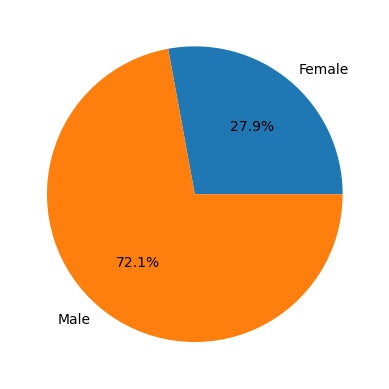

In [34]:
plt.pie(df_gender['Price'], labels=df_gender['Gender'], autopct='%1.1f%%')
plt.savefig('pie_gender.jpg')
plt.show()

In [36]:
# checking if any fields has NONE value
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [37]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

#### All Missing Values are Treated

***Find the DUplicates***

In [38]:
df.duplicated().sum()

0

#### No Duplicates Found

In [39]:
df.describe(include='object')

Gender Profession Marital_status      Education Personal_loan  \
count    1581       1581           1581           1581          1581   
unique      2          2              2              2             2   
top      Male   Salaried        Married  Post Graduate           Yes   
freq     1252        896           1443            985           792   

       House_loan Partner_working   Make  
count        1581            1581   1581  
unique          2               2      3  
top            No             Yes  Sedan  
freq         1054             868    702

### Univariate Analysis

#### Analysing the Categorical fields

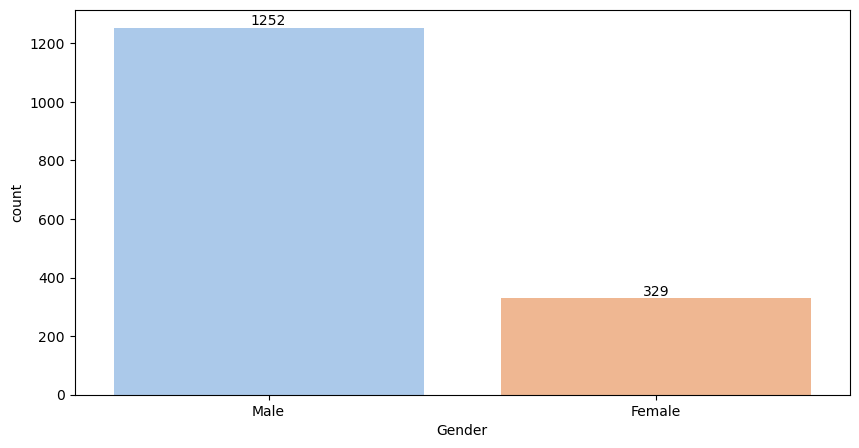

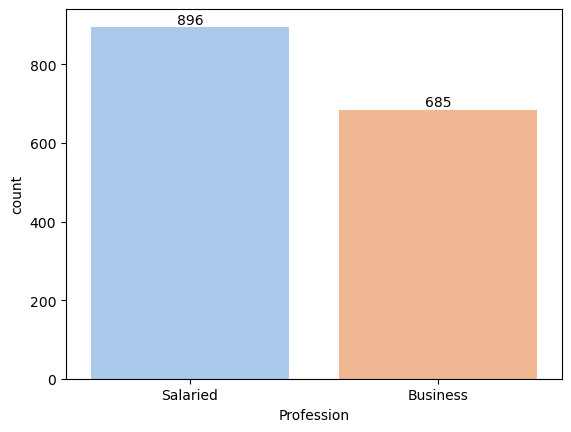

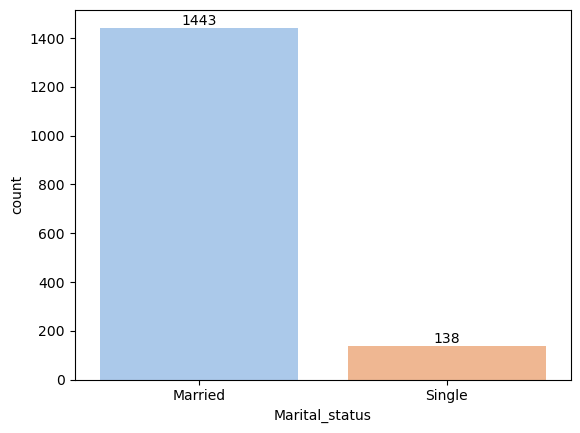

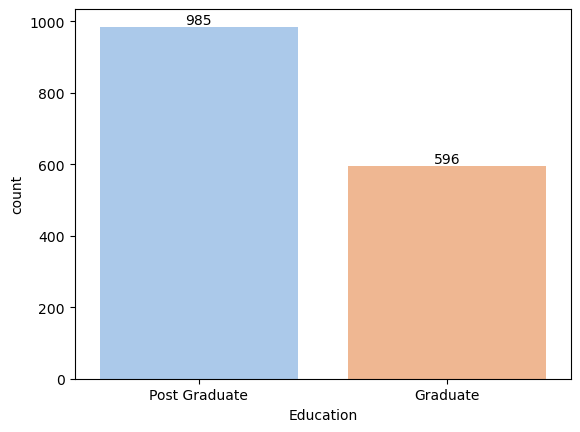

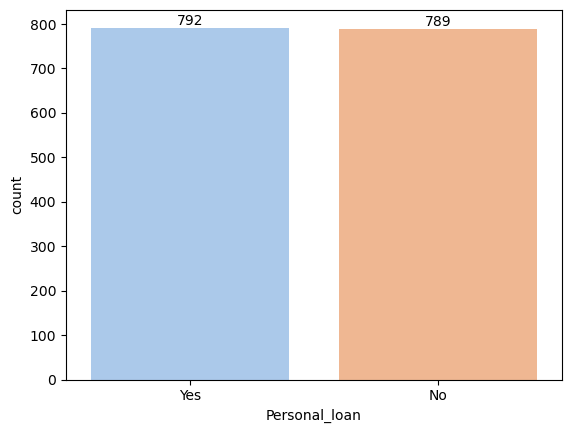

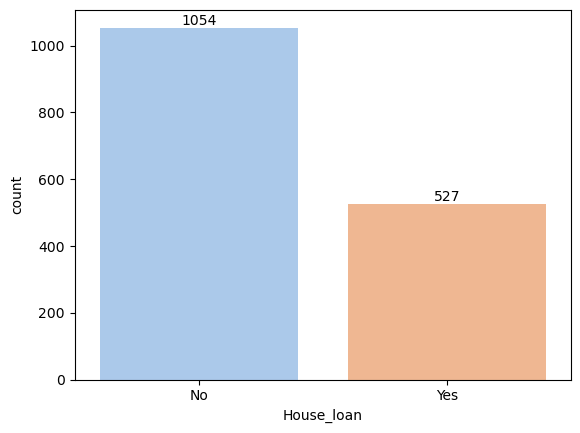

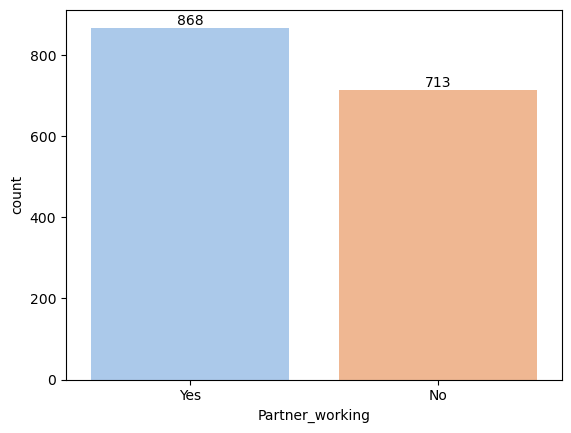

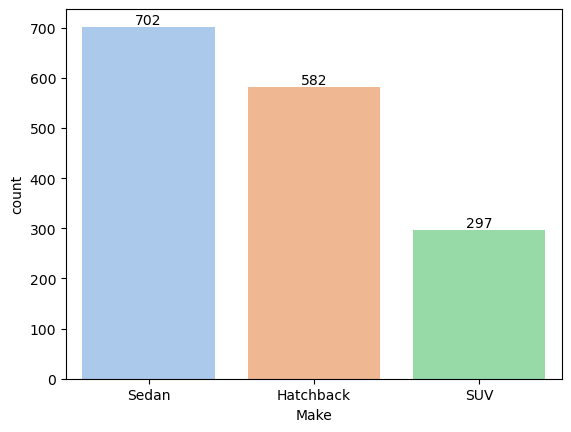

In [40]:

plt.figure(figsize=(10,5))
for i in cat:
    g = sns.countplot(data = df, x = i, order=df[i].value_counts().index, palette='pastel')
    g.bar_label(g.containers[0], label_type='edge')
    plt.savefig(f'{i}.jpg')
    plt.show()

Insights:
- Above visualisation provides the count value of the dataset
- highest number of Make type is Sedan
- Salaried, Post Graduate, Men, Married - are majority with their respective counter parts 

In [41]:
nums

['Age',
 'No_of_Dependents',
 'Salary',
 'Partner_salary',
 'Total_salary',
 'Price']

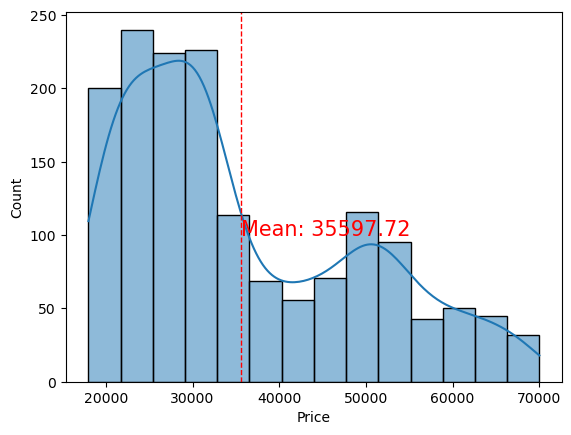

In [42]:
# Visualise the Numeric values
price_avg = df['Price'].mean() 
sns.histplot(data=df, x='Price', kde = True)  
plt.axvline(df['Price'].mean(), color='red', linestyle='dashed', linewidth=1) 
plt.text(price_avg, 100, f'Mean: {price_avg:.2f}', color='red', fontsize=15, ha='left') 
plt.savefig('Price_hist.jpg')

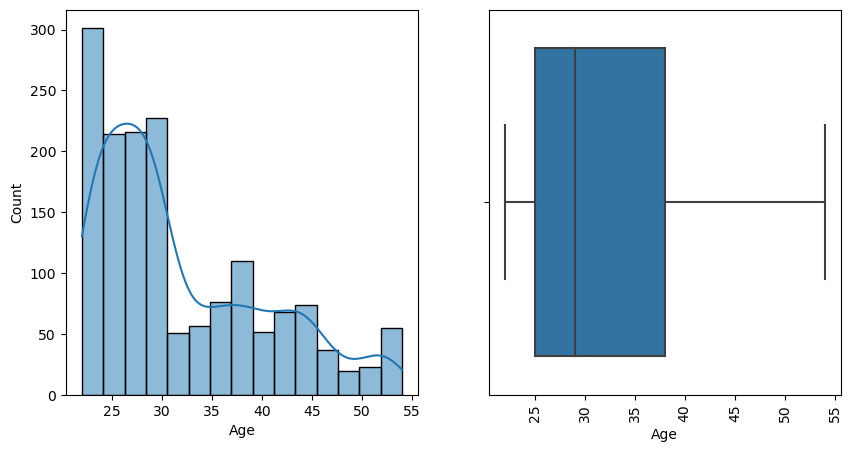

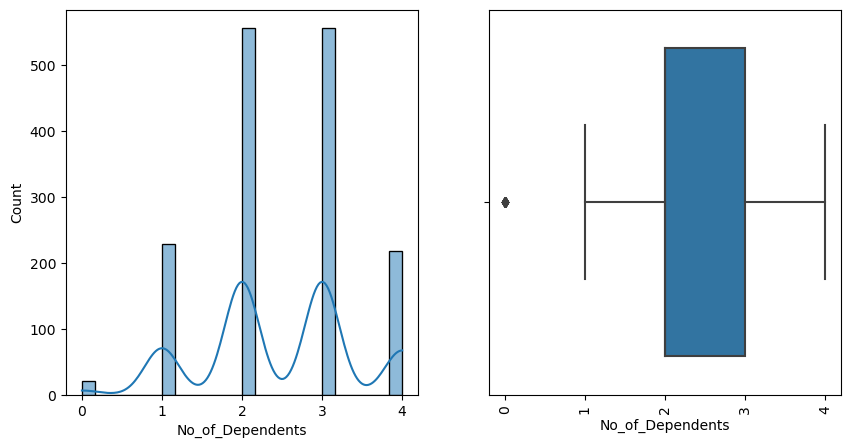

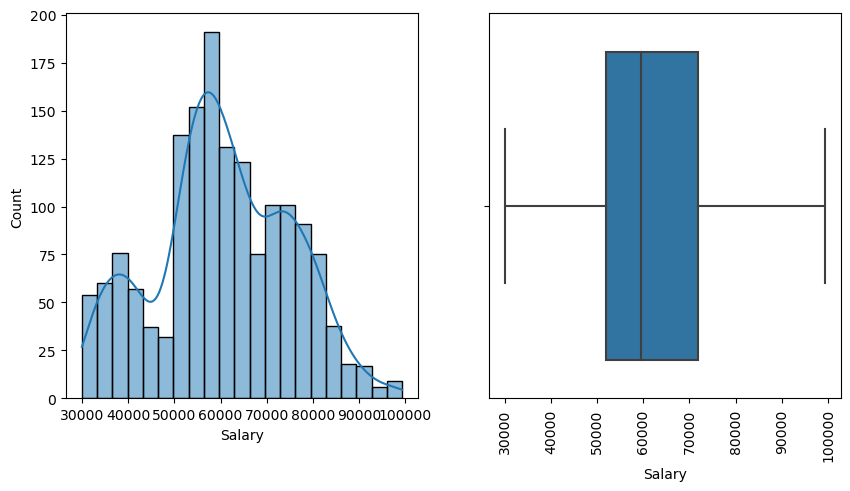

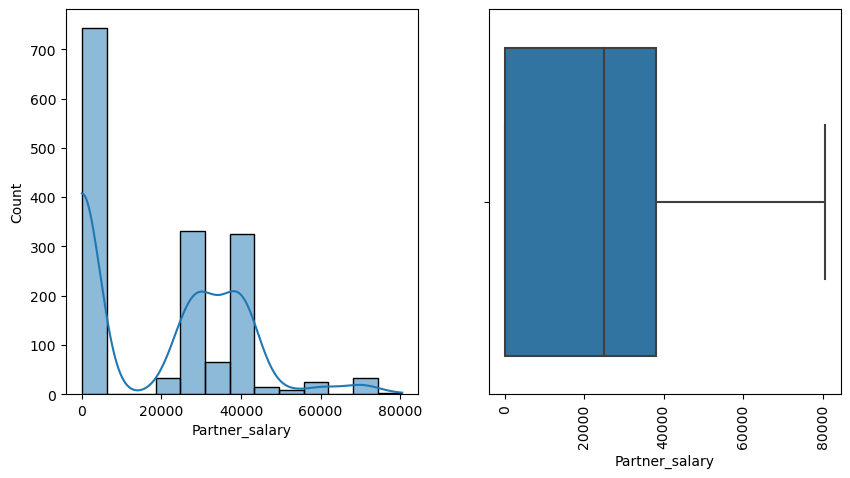

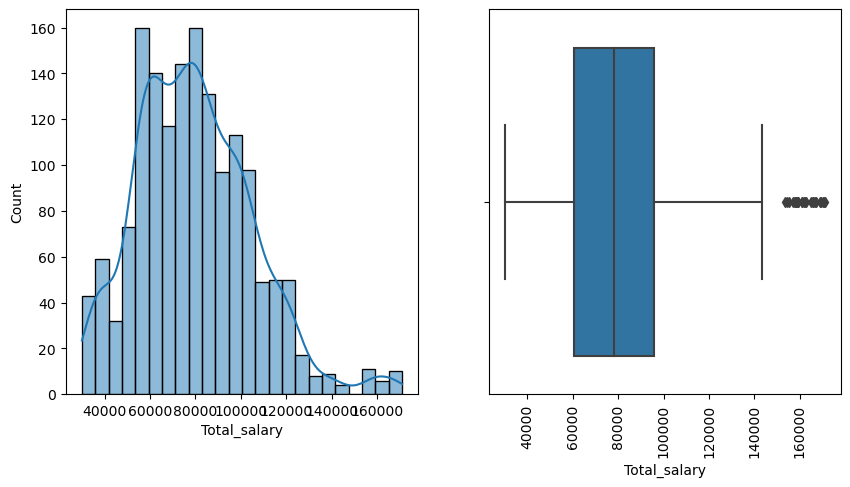

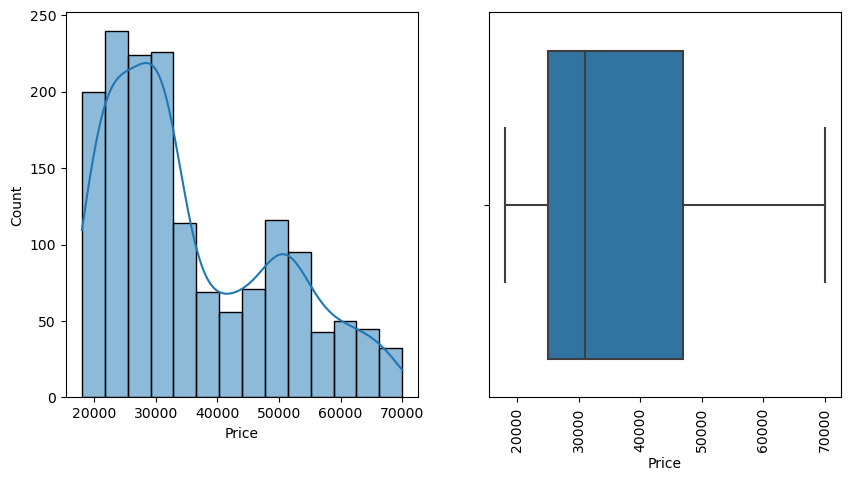

In [43]:
for i in nums:
    fig, axes = plt.subplots(nrows= 1, ncols= 2 , figsize = (10,5), sharex= True)
    sns.boxplot(data=df, x = i, ax = axes[1])
    sns.histplot(data=df, x = i, ax= axes[0], kde=True,)
    plt.xticks(rotation = 90)
    plt.savefig(f'{i}.jpg')
    plt.show()

#### Insights:
- Outliers with Total_Salary, this is legit and not necessary to Normalise
- Most cars sold with Proce less than 40000
- Most People buying as less than 35 Years of Age.

  ***Further analysis might provide/disprove the above assumptions*** 

In [46]:
df[df.Total_salary > 140000].shape

(34, 14)

#### Outliers in Dependent and Total_Salary Feilds
***Validate the values***

In [47]:
def Outliers(col):
    q1 , q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lw = q1 - 1.5* (iqr)
    uw = q3 + 1.5* (iqr)
    return (lw, uw)

In [48]:
lw, uw = Outliers('Total_salary')

In [49]:
df[(df.Total_salary > uw)].shape[0]

27

#### Insight:
- there are 27 salary counts outside the whisker, for now this is only an aboservation no actions intended

#### 27 outliers in Total Salary, if the Sum of Salary and Partner_salary is equal to Total_salary, No Outlier Treatment reruired

In [51]:
# validate if the Total_salary is not equal to sum of Salary and Partner Salary
df[(df.Total_salary != (df.Salary+df.Partner_salary))]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

***NO errors in the Total_Salary and the Values are Legit , So NO outlier Treatment Required***

In [52]:
import plotly.express as px

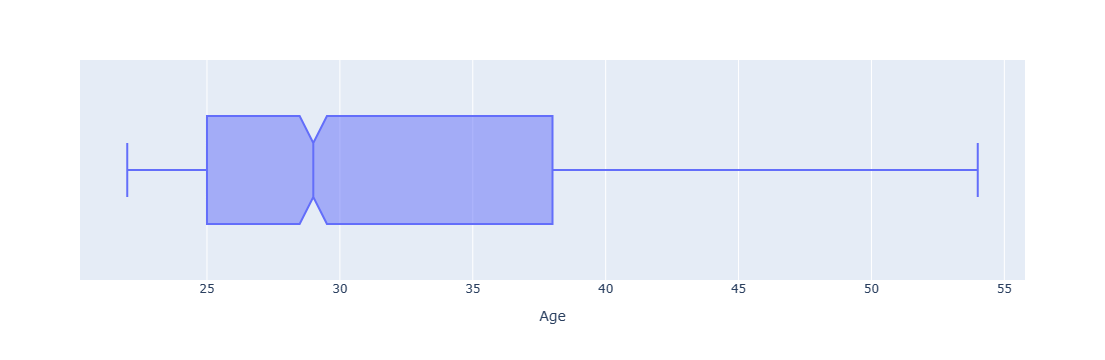

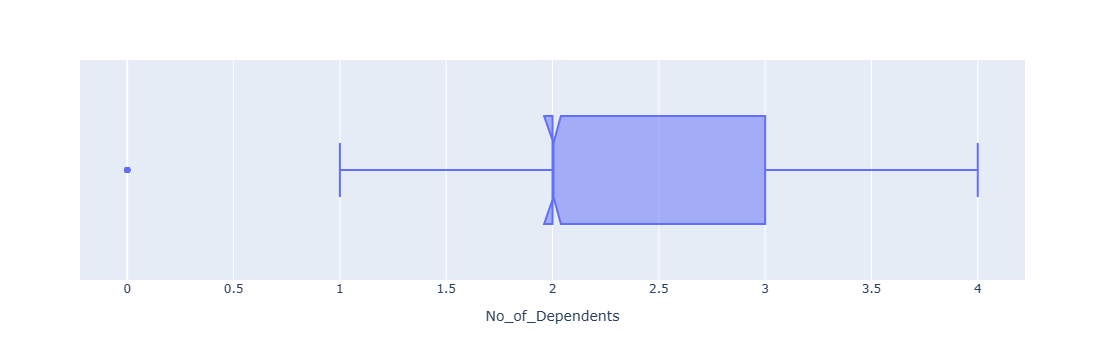

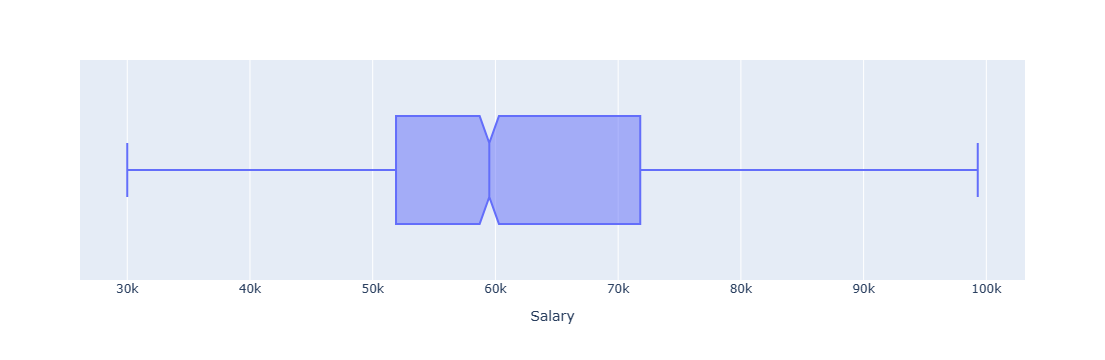

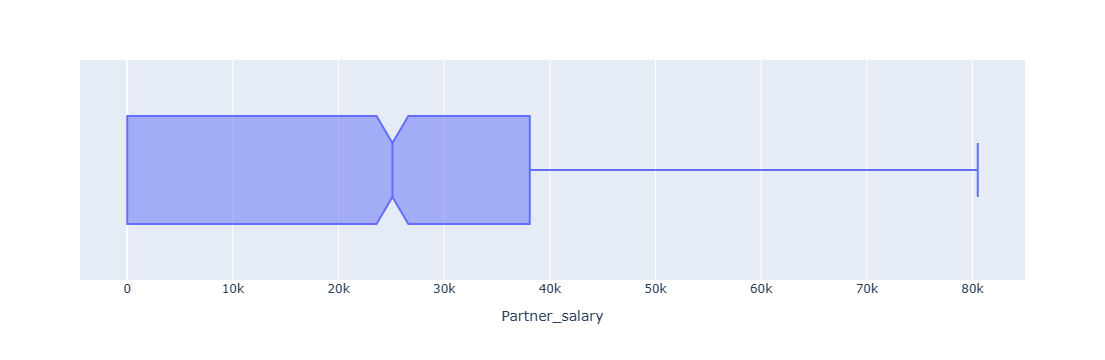

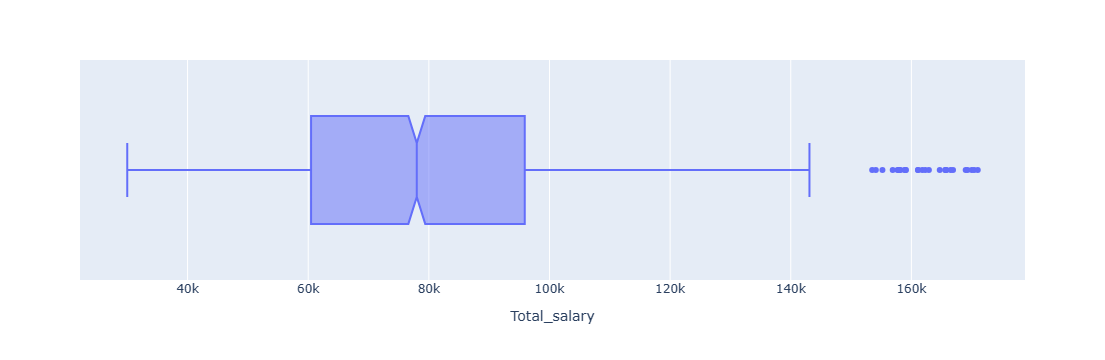

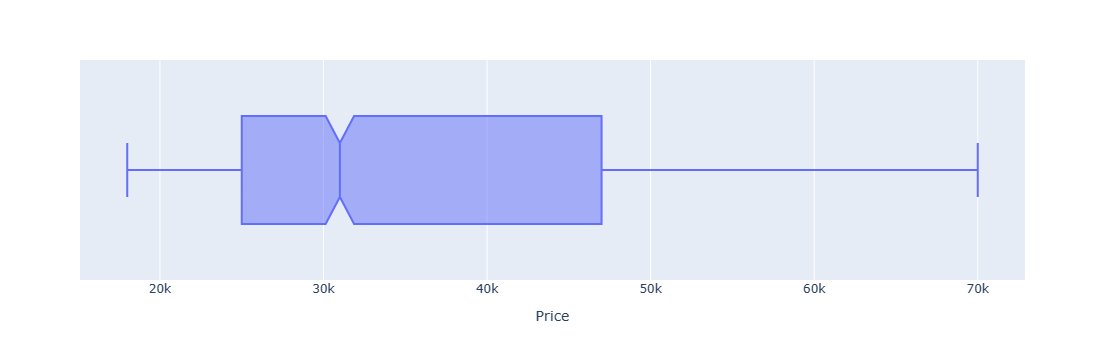

In [53]:
for i in nums:
    pxplot = px.box(data_frame=df, x = i, points='outliers', notched=True)
    pxplot.show()

## Bivariate Analysis

***Relationship between Total_Salary and Price of the Car, whether People with High Salary buying High Price Car?***

In [54]:
nums , cat

(['Age',
  'No_of_Dependents',
  'Salary',
  'Partner_salary',
  'Total_salary',
  'Price'],
 ['Gender',
  'Profession',
  'Marital_status',
  'Education',
  'Personal_loan',
  'House_loan',
  'Partner_working',
  'Make'])

<Axes: xlabel='Price', ylabel='Total_salary'>

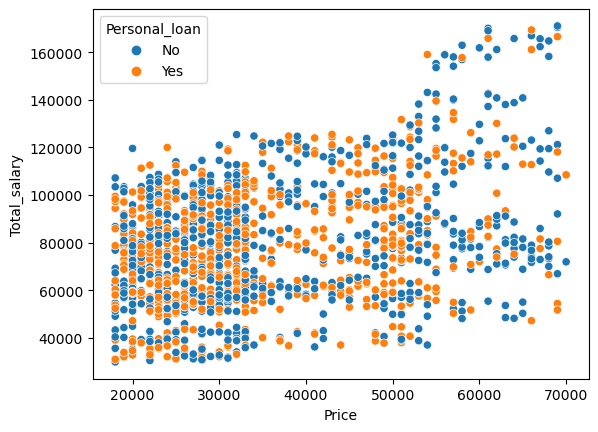

In [55]:
sns.scatterplot(data=df, x='Price', y = 'Total_salary',hue='Personal_loan')

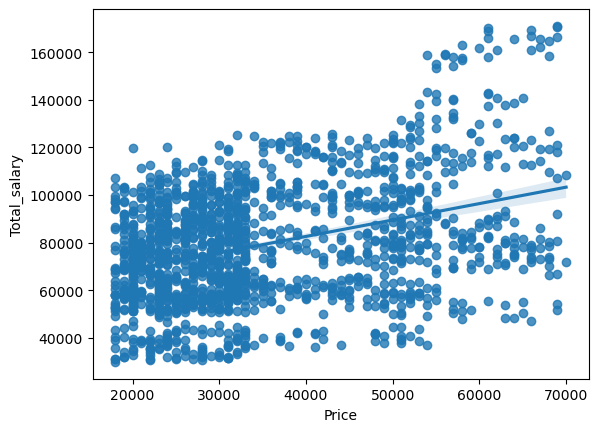

In [56]:
sns.regplot(data=df, x='Price', y = 'Total_salary')
plt.savefig('reg_plot.jpg')
plt.show()


In [57]:
df[['Price', 'Total_salary']].corr()

Price  Total_salary
Price         1.000000      0.367823
Total_salary  0.367823      1.000000

***There is a Positive Correlation with Total Salary and Price of the Car, but not strong enough to consider that only high Salary people buying high price car***

#### CHeck if Older the Age,  Higher the Price of Car Purchased

In [59]:
df[['Price', 'Age']].corr()

Price       Age
Price  1.000000  0.797831
Age    0.797831  1.000000

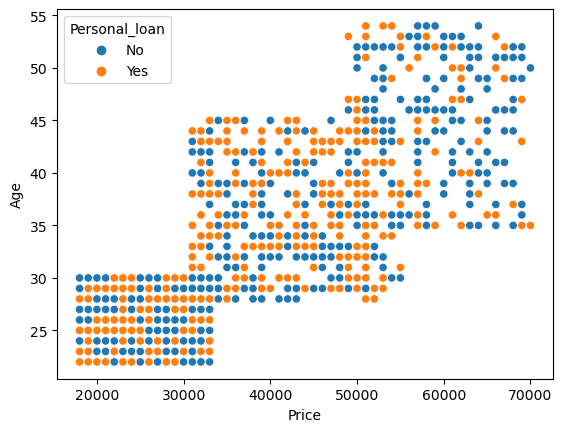

In [60]:
sns.scatterplot(data=df, x='Price', y = 'Age',hue='Personal_loan')
plt.savefig('age_price.jpg')
plt.show()

#### insight:
- Older People tend to prefer High price car. 

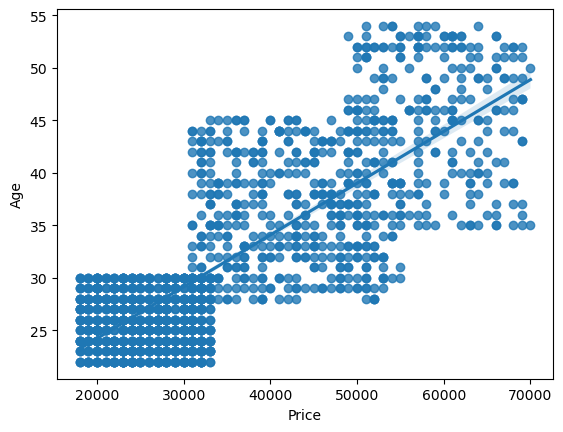

In [62]:
#regression plot
sns.regplot(data=df, x='Price', y = 'Age')
plt.savefig('age_price_lmplot.jpg')
plt.show()

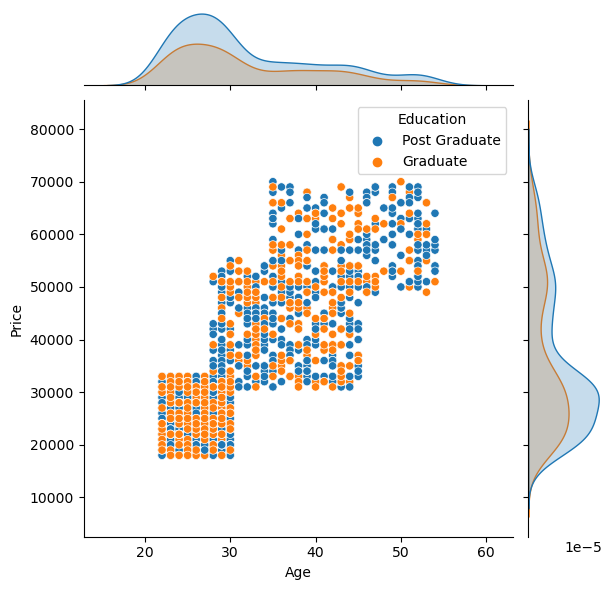

In [63]:
sns.jointplot(df, x = "Age", y = "Price",hue='Education' )
plt.savefig('age_price_education_joint.jpg')
plt.show()

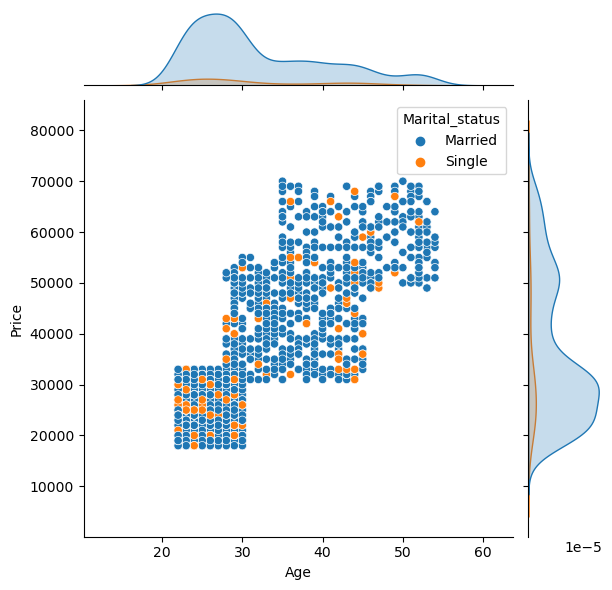

In [64]:
sns.jointplot(df, x = "Age", y = "Price",hue='Marital_status' )
plt.savefig('age_price_marital_joint.jpg')
plt.show()

***Appears a strong correlation  - the Older , the Price of Car purchased is High***

#### CHeck if Older the high the Salary

In [65]:
df[['Salary', 'Age']].corr()

Salary       Age
Salary  1.000000  0.616899
Age     0.616899  1.000000

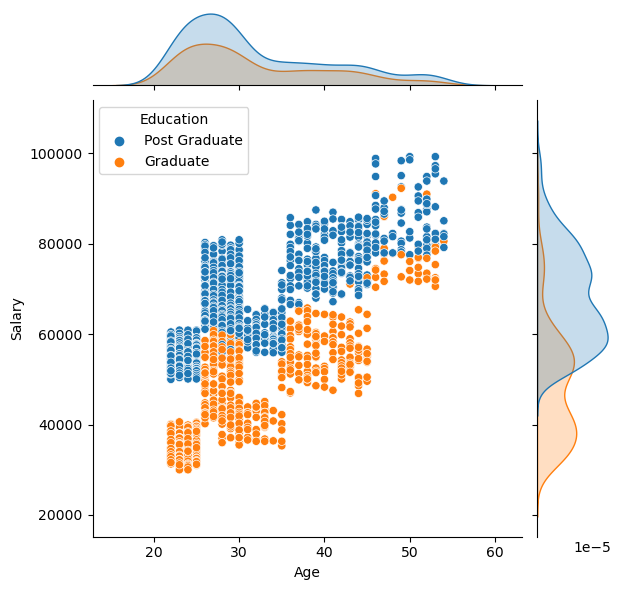

In [66]:
sns.jointplot(df, x = "Age", y = "Salary",hue='Education' )
plt.savefig('age_salary_education.jpg')
plt.show()

***Relatively Strong Correlation, the older people are higher the Salary***

#### Lets Plot all correlation with pairplot

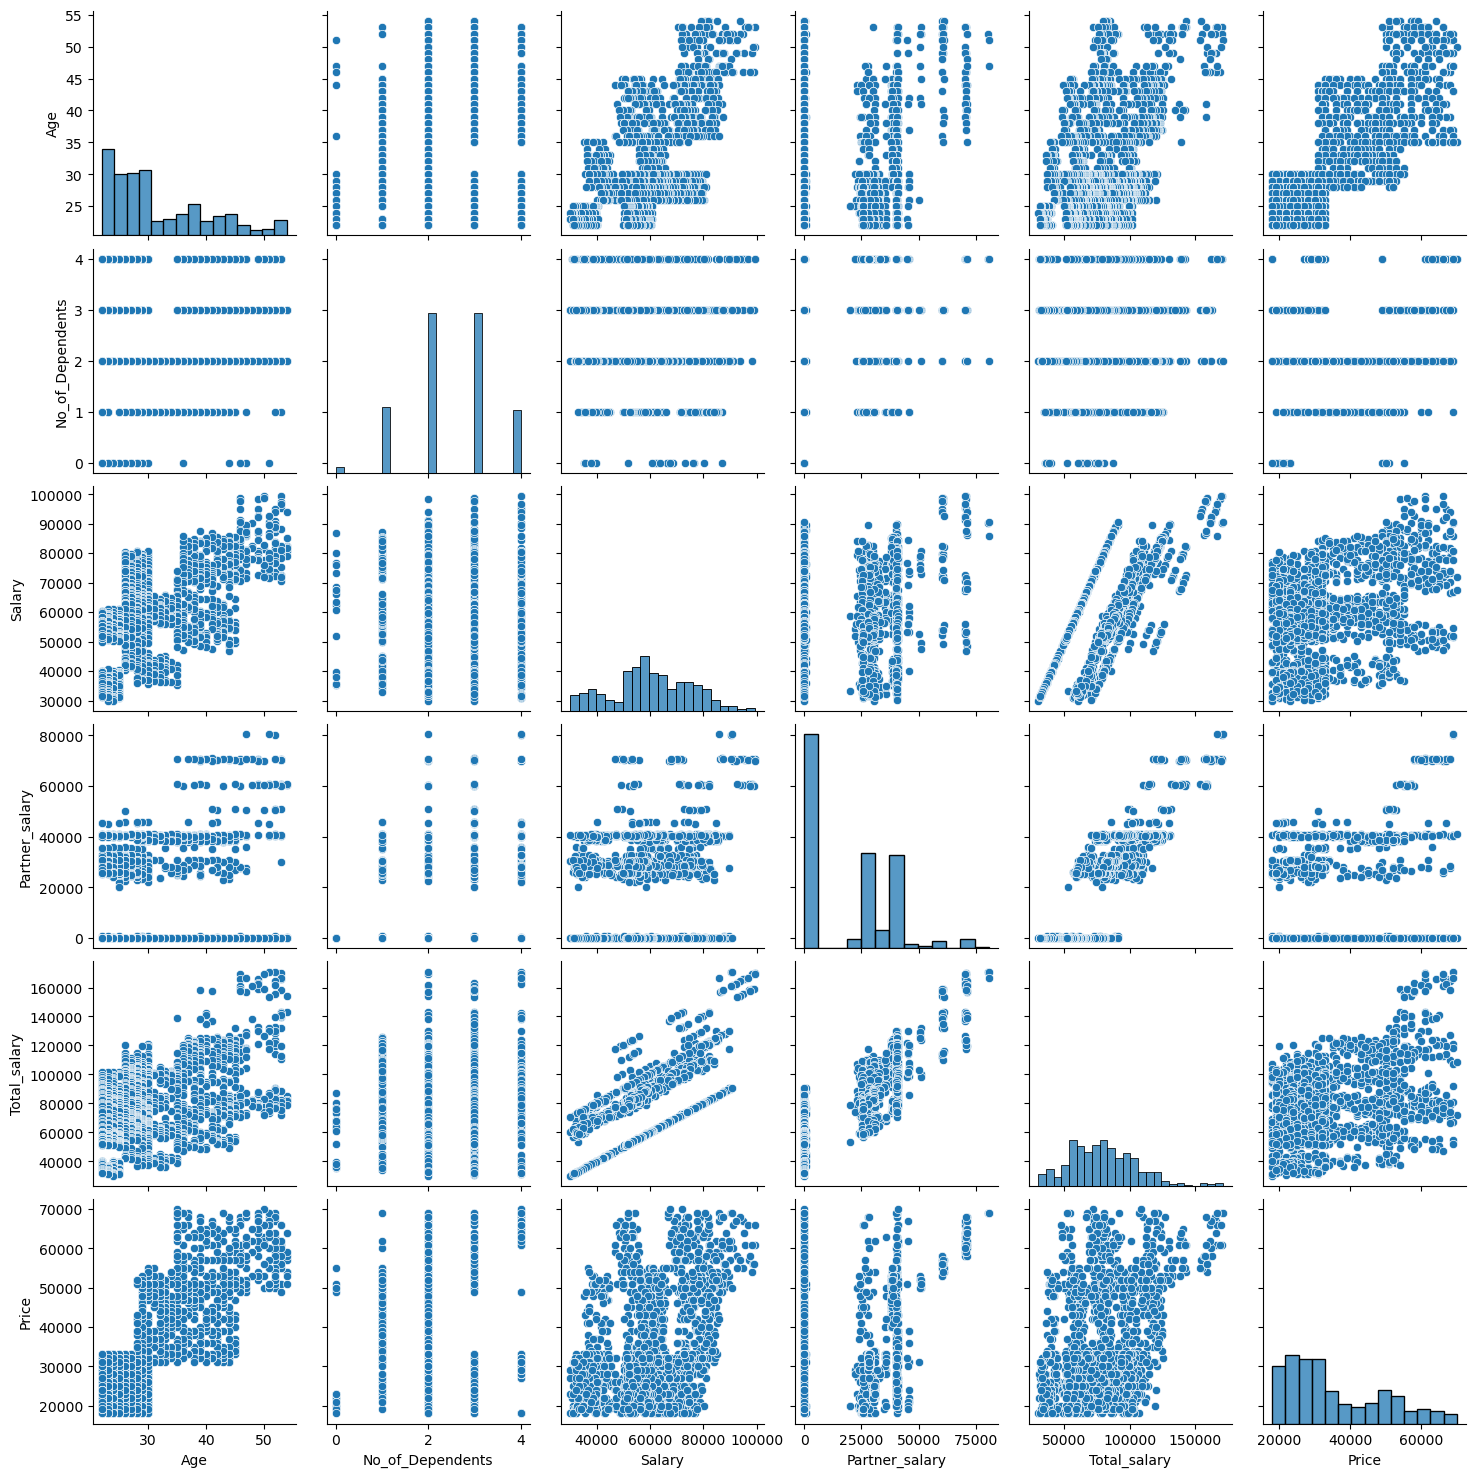

In [67]:
sns.pairplot(df[nums])

In [68]:
df.groupby(by = 'No_of_Dependents')['Price'].count()

No_of_Dependents
0     20
1    229
2    557
3    557
4    218
Name: Price, dtype: int64

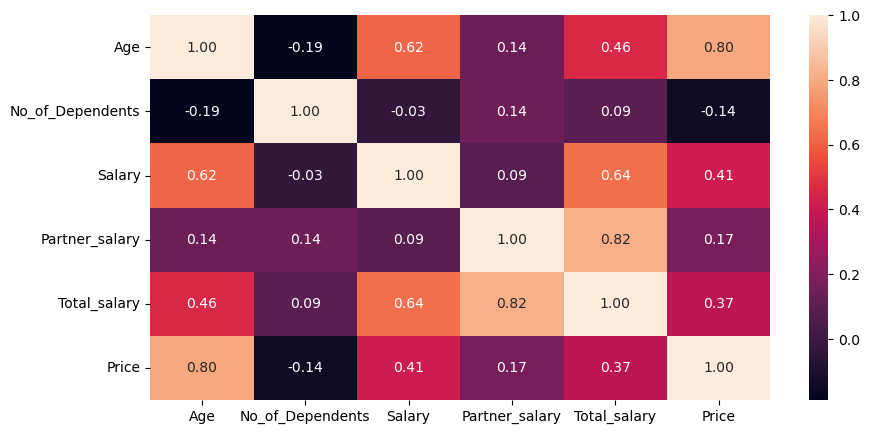

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(df[nums].corr(), annot=True,fmt='.2f');
plt.savefig('heatmap.jpg')
plt.show()

#### Insights:
- Age and Price Strong Correlated
- Age and Salary are moderately correlated
- salary and Total Salary are moderately correlated
- Partner_Salary and Total_salary strongly correlated
  

#### Relationship between Categorical Variables

In [248]:
cat

['Gender',
 'Profession',
 'Marital_status',
 'Education',
 'Personal_loan',
 'House_loan',
 'Partner_working',
 'Make']

In [70]:
pd.crosstab(df.Gender, df.Profession, normalize=True) * 100

Profession   Business   Salaried
Gender                          
Female       6.641366  14.168248
Male        36.685642  42.504744

In [71]:
pd.crosstab(df.Gender, df.Marital_status, normalize=True) * 100

Marital_status    Married    Single
Gender                             
Female          19.418090  1.391524
Male            71.853257  7.337128

In [72]:
pd.crosstab(df.Gender, df.Education, normalize=True)*100

Education   Graduate  Post Graduate
Gender                             
Female      8.728653      12.080961
Male       28.969007      50.221379

In [73]:
pd.crosstab(df.Profession, df.Education, normalize=True)*100

Education    Graduate  Post Graduate
Profession                          
Business    15.749526      27.577483
Salaried    21.948134      34.724858

In [74]:
pd.crosstab(df.Profession, df.Make,  margins=True, normalize=True) * 100

Make        Hatchback        SUV      Sedan         All
Profession                                             
Business    18.342821   5.629349  19.354839   43.327008
Salaried    18.469323  13.156230  25.047438   56.672992
All         36.812144  18.785579  44.402277  100.000000

In [75]:
pd.crosstab(df.Personal_loan, df.Make, margins=True)

Make           Hatchback  SUV  Sedan   All
Personal_loan                             
No                   291  181    317   789
Yes                  291  116    385   792
All                  582  297    702  1581

In [76]:
pd.crosstab(df.House_loan, df.Make, margins=True)

Make        Hatchback  SUV  Sedan   All
House_loan                             
No                347  275    432  1054
Yes               235   22    270   527
All               582  297    702  1581

In [78]:
df.groupby(by=['Gender', 'Make'])['Make'].value_counts()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: count, dtype: int64

In [77]:
pd.crosstab(df.Gender, df.Make, margins=True, normalize=True)*100

Make    Hatchback        SUV      Sedan         All
Gender                                             
Female   0.948767  10.942441   8.918406   20.809614
Male    35.863378   7.843137  35.483871   79.190386
All     36.812144  18.785579  44.402277  100.000000

In [79]:
df.groupby(by=['Gender', 'Make'])['Make'].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

#### Insights:
- Married Male Salaried Post-graduates is Majority
- Salaried people tend to prefer Sedan 
- Personal Loan do not influence purchase
- Housing Loan influence purchase 

In [80]:
cat

['Gender',
 'Profession',
 'Marital_status',
 'Education',
 'Personal_loan',
 'House_loan',
 'Partner_working',
 'Make']

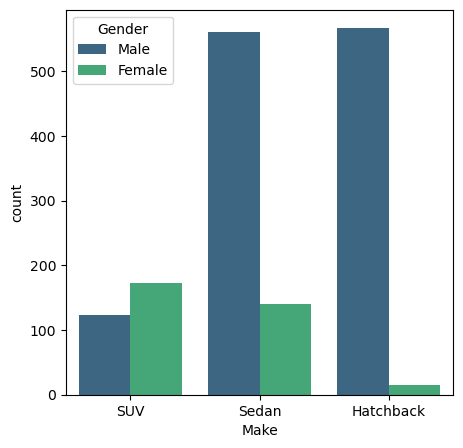

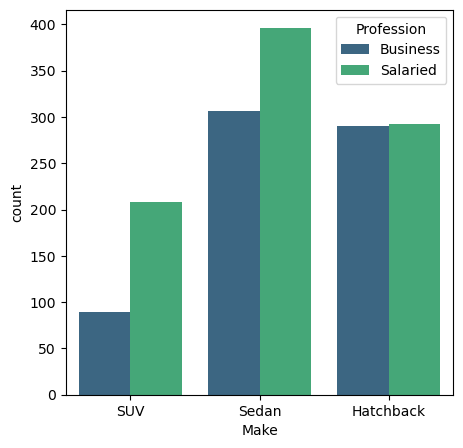

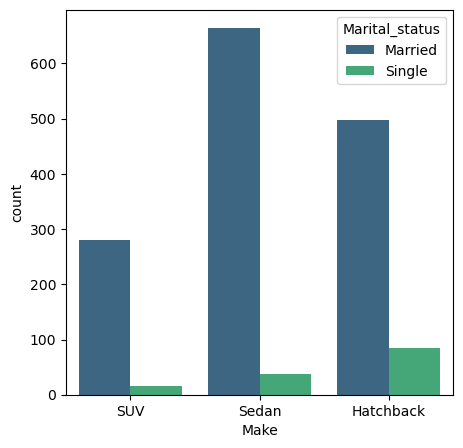

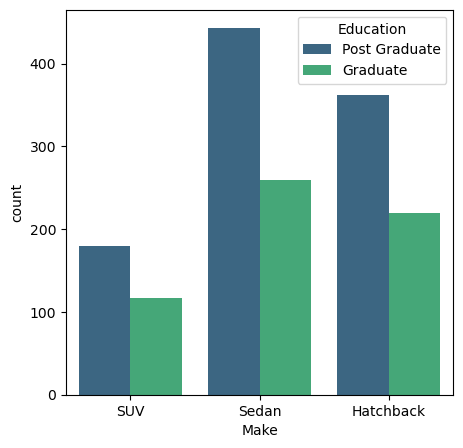

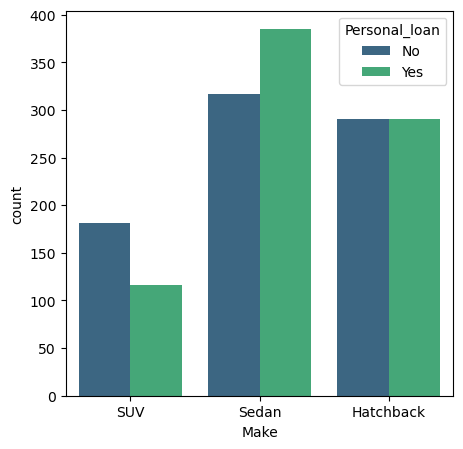

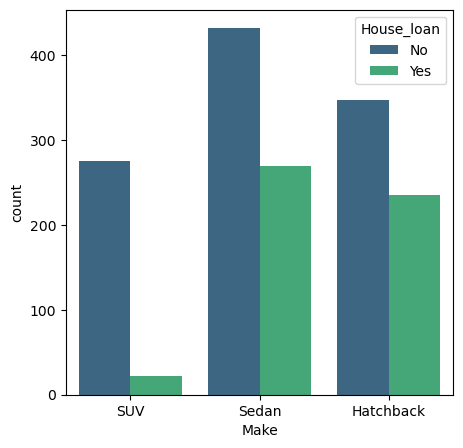

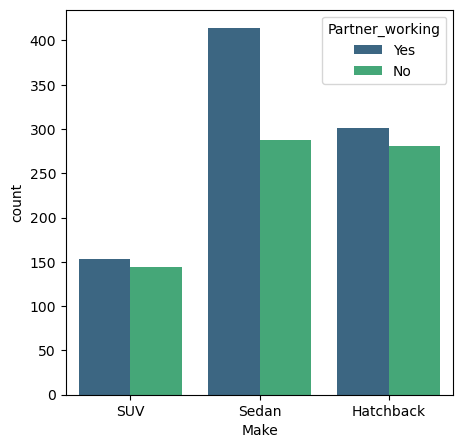

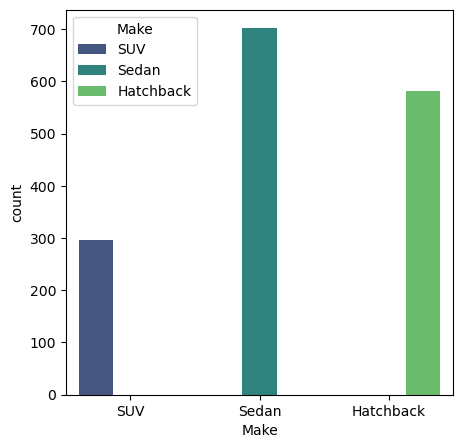

In [84]:
#visualise the above counts 
for i in cat:
    plt.figure(figsize=(5,5))
    sns.countplot(data=df, x = 'Make', hue = i, palette='viridis')
    plt.savefig(f'cat_make_{i}.jpg')
    plt.show()

In [82]:
import warnings
warnings.filterwarnings('ignore')

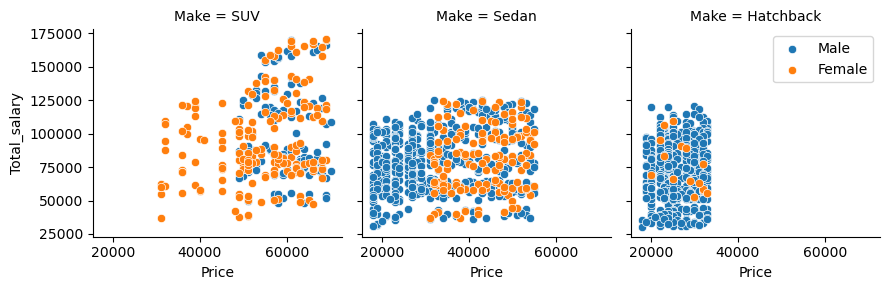

In [85]:
g = sns.FacetGrid(df, col="Make", hue="Gender", col_wrap=3)
g.map(sns.scatterplot, 'Price', 'Total_salary')
plt.legend()
plt.savefig('mv1.jpg')
plt.show()

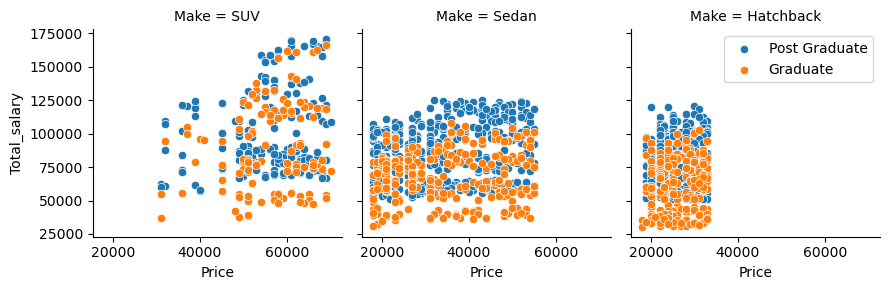

In [86]:
g = sns.FacetGrid(df, col="Make", hue="Education", col_wrap=3)
g.map(sns.scatterplot, 'Price', 'Total_salary')
plt.legend()
plt.savefig('mv1.jpg')
plt.show()

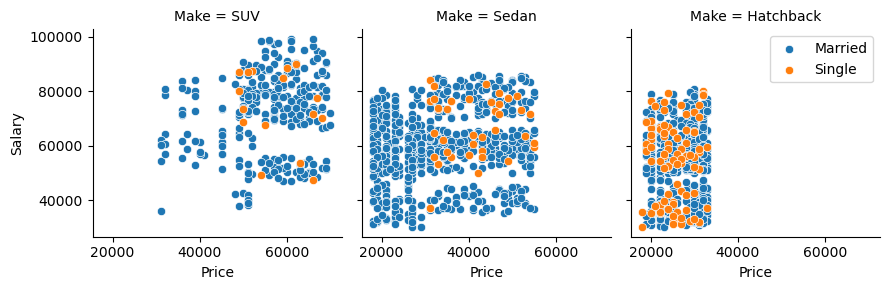

In [87]:
g = sns.FacetGrid(df, col="Make", hue="Marital_status", col_wrap=3)
g.map(sns.scatterplot, 'Price', 'Salary')
plt.legend()
plt.savefig('mv2.jpg')
plt.show()

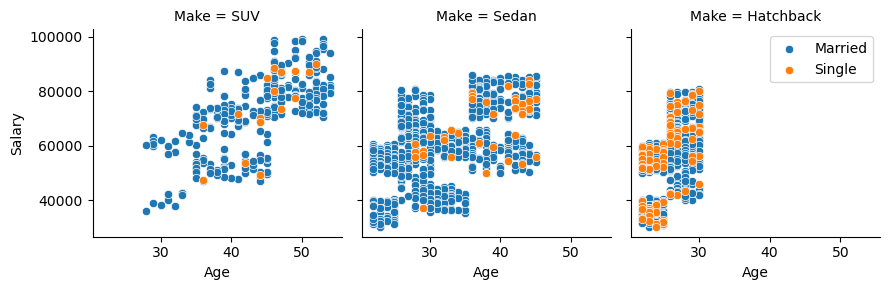

In [479]:
g = sns.FacetGrid(df, col="Make", hue="Marital_status", col_wrap=3)
g.map(sns.scatterplot, 'Age', 'Salary')
plt.legend()
plt.savefig('mv3.jpg')
plt.show()

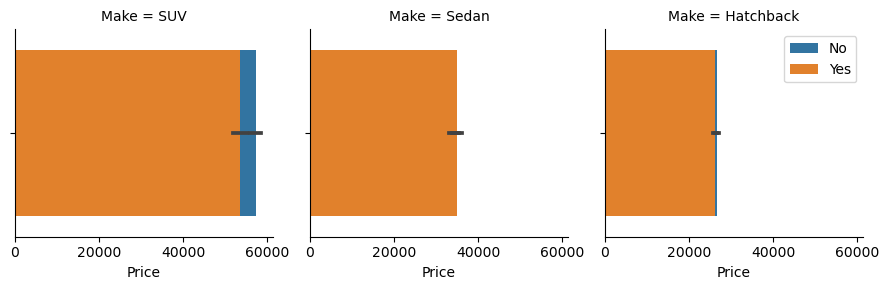

In [88]:
g = sns.FacetGrid(df, col="Make", hue="Personal_loan", col_wrap=3)
g.map(sns.barplot, 'Price', dodge = False)
plt.legend()
plt.show()

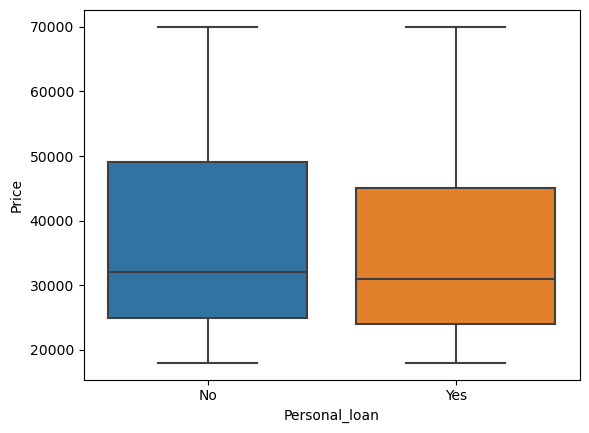

In [89]:
sns.boxplot(data=df, x = 'Personal_loan', y = 'Price')
plt.savefig('box_personal_loan.jpg')

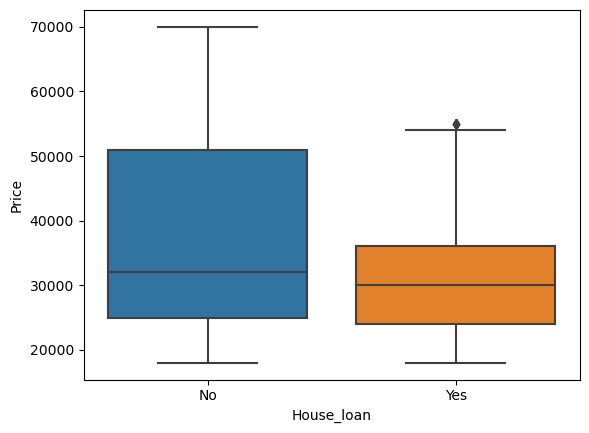

In [90]:
sns.boxplot(data=df, x = 'House_loan', y = 'Price')
plt.savefig('box_House_loan.jpg')


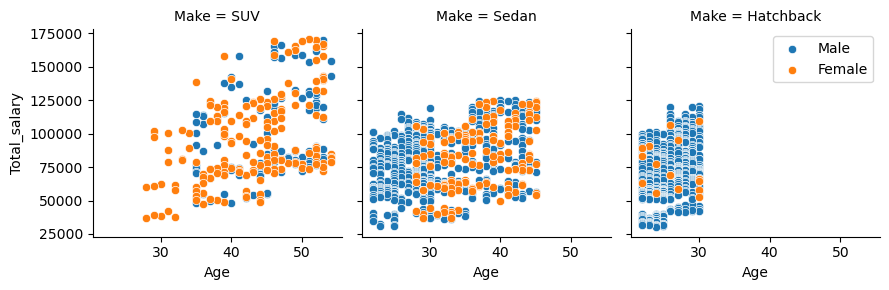

In [91]:
g = sns.FacetGrid(df, col="Make", hue="Gender", col_wrap=3)
g.map(sns.scatterplot, 'Age', 'Total_salary')
plt.legend()
plt.savefig('mv4.jpg')
plt.show()

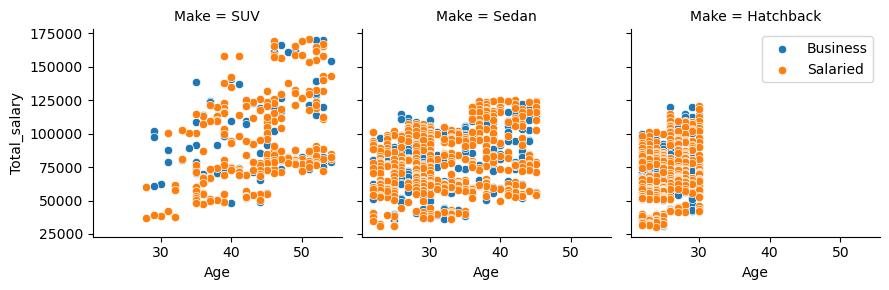

In [92]:
g = sns.FacetGrid(df, col="Make", hue="Profession", col_wrap=3)
g.map(sns.scatterplot, 'Age', 'Total_salary')
plt.legend()
plt.savefig('mv5.jpg')
plt.show()

In [300]:
nums

['Age',
 'No_of_Dependents',
 'Salary',
 'Partner_salary',
 'Total_salary',
 'Price']

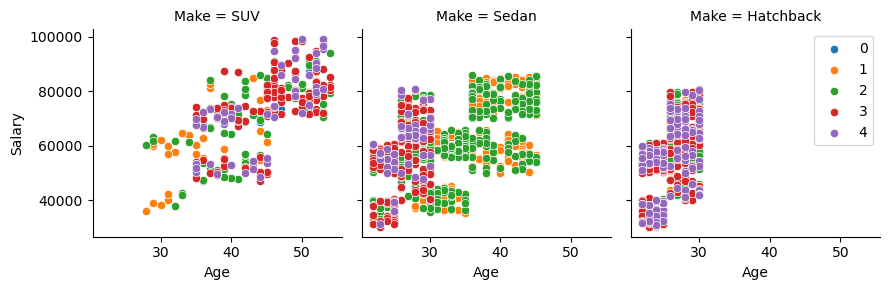

In [93]:
g = sns.FacetGrid(df, col="Make", hue="No_of_Dependents", col_wrap=3)
g.map(sns.scatterplot, 'Age', 'Salary')
plt.legend()
plt.show()

#### Key Questions

#### 1. Do Men Tend to Prefer SUVs more compared to Women


In [312]:
df.groupby(by = ['Gender', 'Make'])['Make'].value_counts().unstack()

Make    Hatchback  SUV  Sedan
Gender                       
Female         15  173    141
Male          567  124    561

In [319]:
df.groupby(by = ['Gender', 'Make'])['Make'].count().unstack().rank(method = 'dense', ascending = False)

Make    Hatchback  SUV  Sedan
Gender                       
Female        2.0  1.0    2.0
Male          1.0  2.0    1.0

***Above methods display:***
```
- Total number of SUVs bought by Female is greater than SUVs bought by Male in this Sample
- Also, the relative number - rank within the Gender Category SUVs bought by Female is More
```

#### 2. What is the likelihood of a salaried person buying a Sedan?

In [94]:
#Experimental
df.pivot_table(index=['Profession', 'Gender'], columns='Make', values='Price', margins=True, aggfunc='sum')

Make                Hatchback         SUV       Sedan       All
Profession Gender                                              
Business   Female         NaN   2944000.0   2121000.0   5065000
           Male     7629000.0   2074000.0   8079000.0  17782000
Salaried   Female    412000.0   6308000.0   3910000.0  10630000
           Male     7367000.0   5254000.0  10182000.0  22803000
All                15408000.0  16580000.0  24292000.0  56280000

In [95]:
#Experimental
df.pivot_table(index=['Profession'], columns='Make', values='Price', margins=True, aggfunc='sum')

Make        Hatchback       SUV     Sedan       All
Profession                                         
Business      7629000   5018000  10200000  22847000
Salaried      7779000  11562000  14092000  33433000
All          15408000  16580000  24292000  56280000

In [96]:
#Experimental
df.pivot_table(index=['Profession', 'Gender'], columns='Make', values='Price', margins=True, aggfunc='mean')

Make                  Hatchback           SUV         Sedan           All
Profession Gender                                                        
Business   Female           NaN  53527.272727  42420.000000  48238.095238
           Male    26306.896552  61000.000000  31558.593750  30658.620690
Salaried   Female  27466.666667  53457.627119  42967.032967  47455.357143
           Male    26595.667870  58377.777778  33383.606557  33933.035714
All                26474.226804  55824.915825  34603.988604  35597.722960

In [97]:
likelihood = round((len(df[(df['Profession'] == 'Salaried') & (df['Make'] == 'Sedan')])/len(df[df['Profession'] == 'Salaried']))*100, 2)

In [101]:
print(f'The Salaried person likely to buy a sedan is {likelihood}%')

The Salaried person likely to buy a sedan is 44.2%


In [98]:
df.groupby(by = ['Profession', 'Make'])['Make'].count()

Profession  Make     
Business    Hatchback    290
            SUV           89
            Sedan        306
Salaried    Hatchback    292
            SUV          208
            Sedan        396
Name: Make, dtype: int64

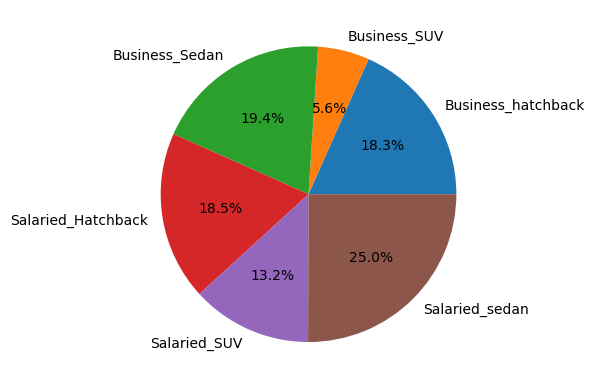

In [102]:
plt.pie(df.groupby(by = ['Profession', 'Make'])['Make'].count().values,
        labels=['Business_hatchback',
                'Business_SUV',
                'Business_Sedan',
                'Salaried_Hatchback',
                'Salaried_SUV',
                'Salaried_sedan'],
        autopct='%1.1f%%')
plt.savefig('pie_Business_salaried.jpg')
plt.show()

In [103]:
salaried_person = df[df['Profession'] == 'Salaried']

In [104]:
salaried_person.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   
5   53  Female   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   
5            No         No             Yes   79800         60500.0   

   Total_salary  Price Make  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV  
5        140300  57000  SUV

In [105]:
salaried_person.shape

(896, 14)

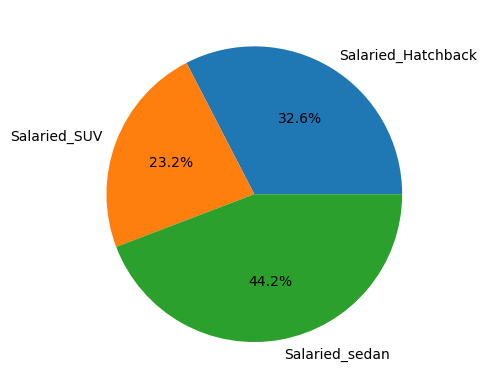

In [106]:
plt.pie(salaried_person.groupby(by = ['Make'])['Make'].count().values,
                labels=[
                'Salaried_Hatchback',
                'Salaried_SUV',
                'Salaried_sedan'],
        autopct='%1.1f%%')
plt.savefig('pie_within_salaried.jpg')
plt.show()

In [107]:
print(f'There is a Probability of {likelihood}% that Salaried Profession buy Sedan')

There is a Probability of 44.2% that Salaried Profession buy Sedan


#### Experimental Answer
```
- Salaried People Spend Most on Sedan
- if we groupby Gender, then Salaried Female Spend on SUV and Both Salaried & Business ProfessionMen 
Spend on Sedan 
- Female in Both Profession Business and Salaried Spend relatively less on Buying Sedan v/s SUV
```

***the Countplot visualised above, in this Question - Price was considered specfically to understand the Spending Values with an experimental Approach***

In [108]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

#### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [109]:
df.pivot_table(index=['Profession', 'Gender'], columns='Make', values='Price', margins=True, aggfunc='sum')

Make                Hatchback         SUV       Sedan       All
Profession Gender                                              
Business   Female         NaN   2944000.0   2121000.0   5065000
           Male     7629000.0   2074000.0   8079000.0  17782000
Salaried   Female    412000.0   6308000.0   3910000.0  10630000
           Male     7367000.0   5254000.0  10182000.0  22803000
All                15408000.0  16580000.0  24292000.0  56280000

In [110]:
df.groupby(by = ['Gender', 'Profession'])['Make'].value_counts().unstack()

Make               Hatchback    SUV  Sedan
Gender Profession                         
Female Business          NaN   55.0   50.0
       Salaried         15.0  118.0   91.0
Male   Business        290.0   34.0  256.0
       Salaried        277.0   90.0  305.0

***Sheldon Cooper's Claim on Salaried MALE target for SUV Sale can be Rejected, Salaried Male Tend to Purchase Sedan***

#### 4. How does the the amount spent on purchasing automobiles vary by gender?

In [111]:
df.pivot_table(index='Gender', values = 'Price', columns='Make', margins=True, aggfunc = 'sum')

Make    Hatchback       SUV     Sedan       All
Gender                                         
Female     412000   9252000   6031000  15695000
Male     14996000   7328000  18261000  40585000
All      15408000  16580000  24292000  56280000

In [112]:
df100 = df.groupby(by = ['Gender', 'Make'])['Price'].mean().reset_index()

In [113]:
df100

Gender       Make         Price
0  Female  Hatchback  27466.666667
1  Female        SUV  53479.768786
2  Female      Sedan  42773.049645
3    Male  Hatchback  26447.971781
4    Male        SUV  59096.774194
5    Male      Sedan  32550.802139

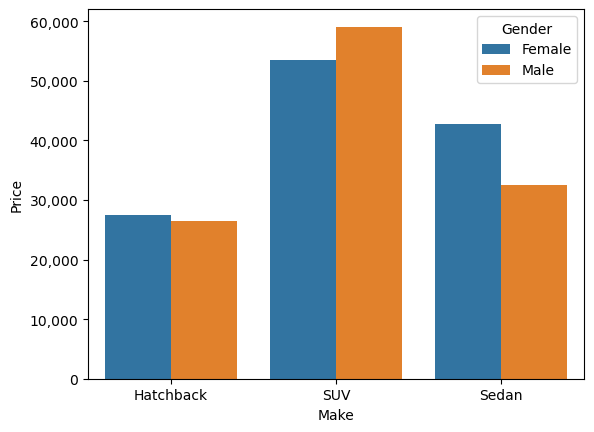

In [114]:
from matplotlib.ticker import FuncFormatter
sns.barplot(data=df100, x = 'Make' , y ='Price', hue='Gender', estimator='sum')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

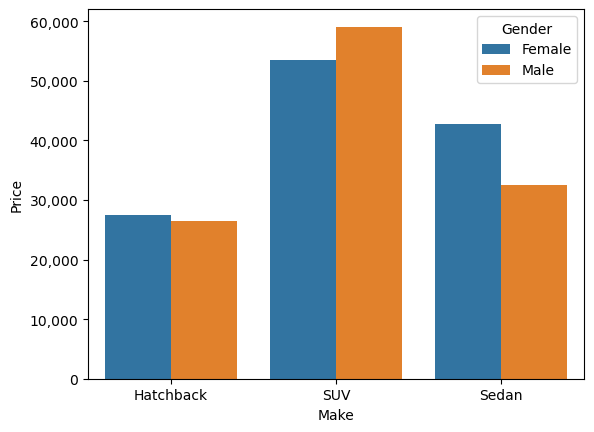

In [115]:
sns.barplot(data=df100, x = 'Make' , y ='Price', hue='Gender', estimator='mean')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

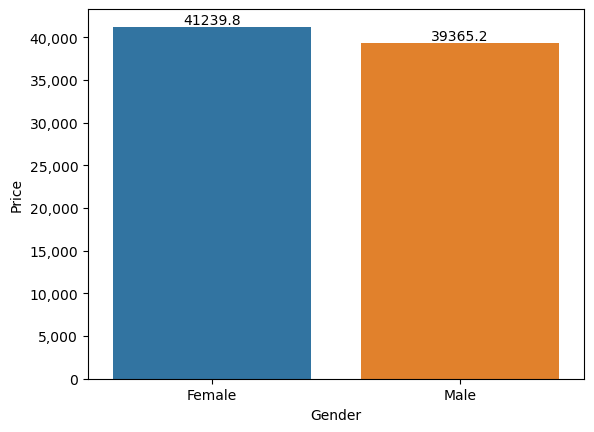

In [116]:
g = sns.barplot(data=df100, x = 'Gender' , y ='Price', estimator='mean', dodge=False, errorbar=('ci', False))
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
g.bar_label(g.containers[0], label_type='edge');
plt.savefig('amt_spent_vary_Gender.jpg')
plt.show()

#### Insights:
- Men Spend Most on Sedan
- Female Spend Most on SUV


#### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

values [28990000.0, 27290000.0]


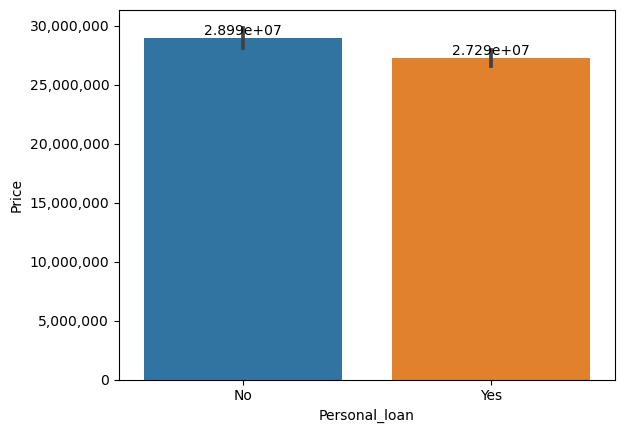

In [117]:
g = sns.barplot(data=df, x = 'Personal_loan', y = 'Price', estimator='sum')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
heights= [i.get_height() for i in g.containers[0]]
print(f'values {heights}')
g.bar_label(g.containers[0], label_type='edge');


values [36742.71229404309, 34457.07070707071]


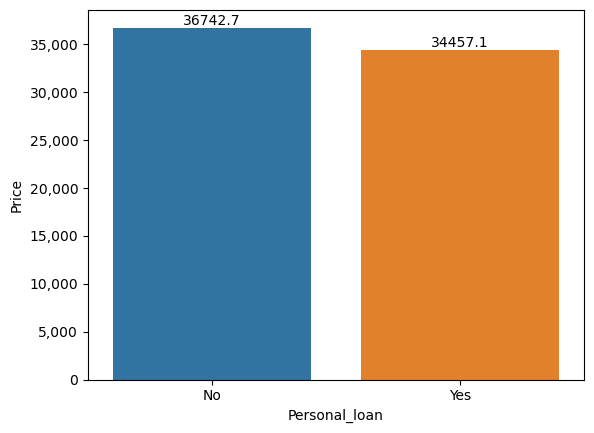

In [118]:
g = sns.barplot(data=df, x = 'Personal_loan', y = 'Price', estimator='mean', errorbar=('ci', False))
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
heights= [i.get_height() for i in g.containers[0]]
print(f'values {heights}')
g.bar_label(g.containers[0], label_type='edge');
plt.savefig('amt_spent_vary_personal_loan.jpg')
plt.show()

In [119]:
df.groupby(by = 'Personal_loan')['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [121]:
df200 = df.groupby(by = ['Personal_loan', 'Make'])['Price'].sum().reset_index()

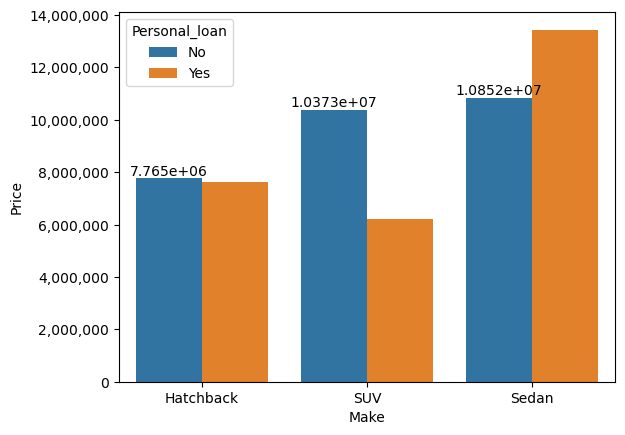

In [122]:
from matplotlib.ticker import FuncFormatter
g = sns.barplot(data=df200, x = 'Make' , y ='Price', hue='Personal_loan', estimator='sum', dodge=True)
g.bar_label(g.containers[0], label_type='edge')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

In [123]:
df['price_bucket'] = pd.cut(df['Price'], bins=3, labels=['LOW','MEDIUM', 'HIGH'])

In [124]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make price_bucket  
0        170000  61000  SUV         HIGH  
1        165800  61000  SUV         HIGH  
2        158000  57000  SUV         HIGH  
3        142800  61000  SUV         HIGH  
4        139900  57000  SUV         HIGH

In [125]:
df.groupby(by = ['price_bucket', 'Partner_working'])['Partner_working'].count().unstack()

Partner_working   No  Yes
price_bucket             
LOW              440  542
MEDIUM           159  202
HIGH             114  124

In [126]:
df.groupby(by = ['price_bucket', 'Partner_working'])['Total_salary'].mean()

price_bucket  Partner_working
LOW           No                  56945.454545
              Yes                 86138.560886
MEDIUM        No                  62484.276730
              Yes                102220.792079
HIGH          No                  71621.929825
              Yes                124170.161290
Name: Total_salary, dtype: float64

In [127]:
df.groupby(by = ['price_bucket', 'Partner_working'])['Partner_salary'].mean().unstack()

Partner_working   No           Yes
price_bucket                      
LOW              0.0  30532.103321
MEDIUM           0.0  36945.544554
HIGH             0.0  51590.322581

``` 
- People who took Personal Look Total amount spent  = 28990000.0
```

### 6. How does having a working partner influence the purchase of higher-priced cars?

In [128]:
df.Marital_status.value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

#### for this Question - lets Only Consider Married rows

In [129]:
df300 = df[df.Marital_status == 'Married']

In [130]:
df300.shape

(1443, 15)

In [131]:
df300.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make',
       'price_bucket'],
      dtype='object')

In [132]:
df400 = df300.pivot_table(index='Partner_working' , values = 'Price', aggfunc='mean', columns = 'Make').reset_index()

In [133]:
df400

Make Partner_working     Hatchback           SUV         Sedan
0                 No  26736.040609  56000.000000  34452.000000
1                Yes  26614.617940  55496.732026  34082.125604

In [134]:
df300.pivot_table(index='Partner_working' , values = ['Price', 'Total_salary'], aggfunc='mean').reset_index()

Partner_working         Price  Total_salary
0              No  36605.217391  60610.260870
1             Yes  35267.281106  95314.285714

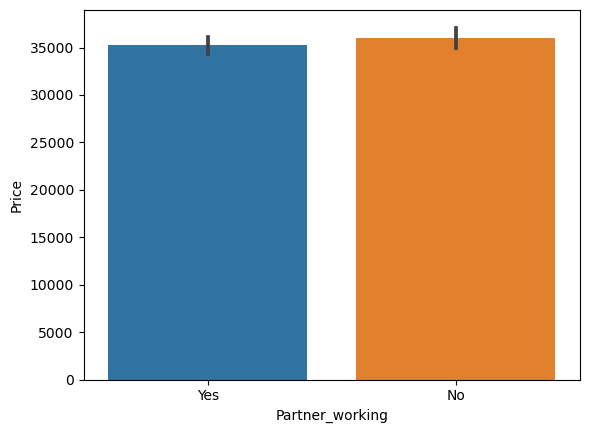

In [135]:
sns.barplot(data=df, x = 'Partner_working', y = 'Price', estimator='mean');

```
- Average Total_Salary of Partner_Working under Married segment is 95k
- Average Spent is 35k, relatively lesser than Married NON-WORKING Partner who spend 36k
```

***end of problem1***

# Problem 2 

In [4]:
go = pd.read_excel('godigt_cc_data.xlsx')

In [5]:
go.head()

userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748   Visa        edge   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   
3       1999-06-01             E          0          1          1  ...   
4       2006-06-13             B          1          1          1  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1            52                   0                   0                  0   
2            23                   1                   0                  0   
3            49                   0                   0                  1   
4            21                   1                   0                  0   

   T+6_month_activity  T+12_month_activity  Transactor_revolver  \
0                   0                    0                    T   
1                   0                    0                    R   
2                   0                    0                    R   
3                   0                    0                    T   
4                   0                    0                    T   

  avg_spends_l3m  Occupation_at_source  cc_limit  
0          27729         Self Employed    290000  
1         280854                     0    950000  
2          70587               Student    210000  
3           9156         Self Employed     80000  
4          38108              Salaried    220000  

[5 rows x 28 columns]

In [6]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [7]:
import dtale

In [8]:
dtale.show(go)